<ipython-input-4-61ee88443038>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-4-61ee88443038>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     39968
           1       0.56      0.11      0.19      8790

    accuracy                           0.82     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.82      0.77     48758



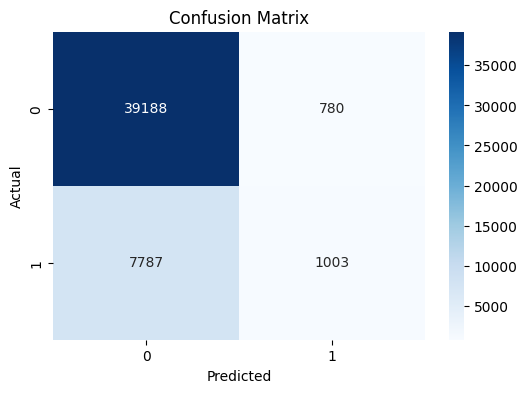

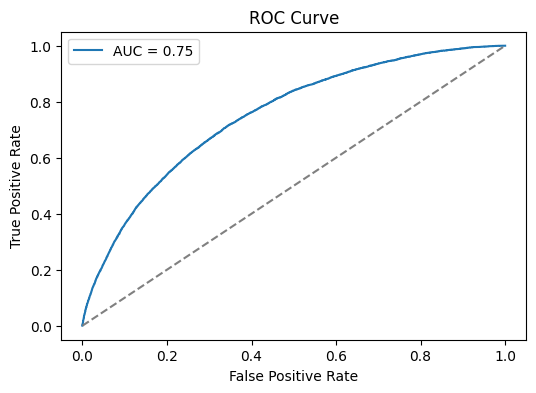

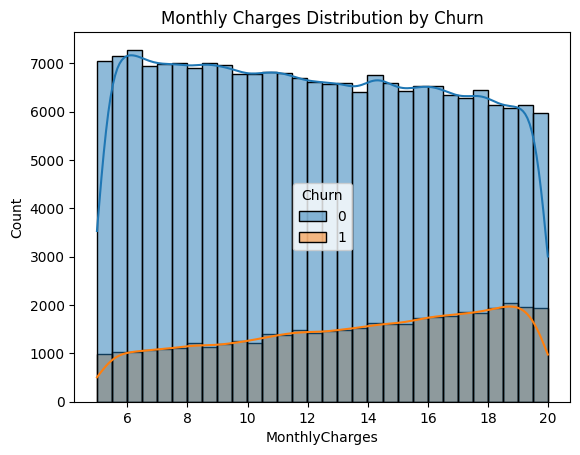

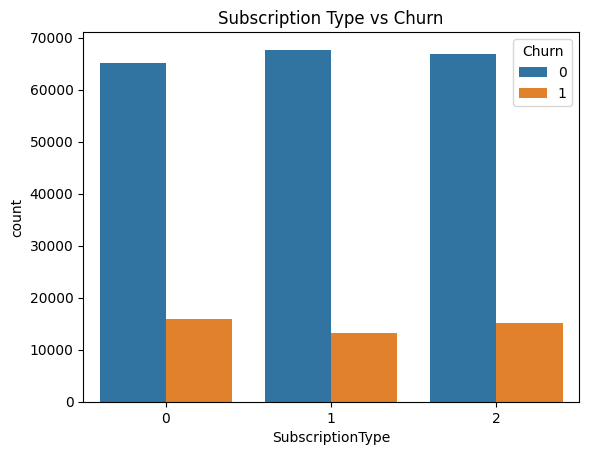

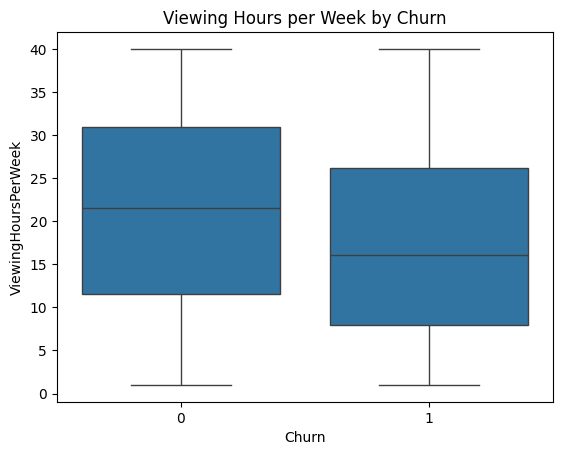

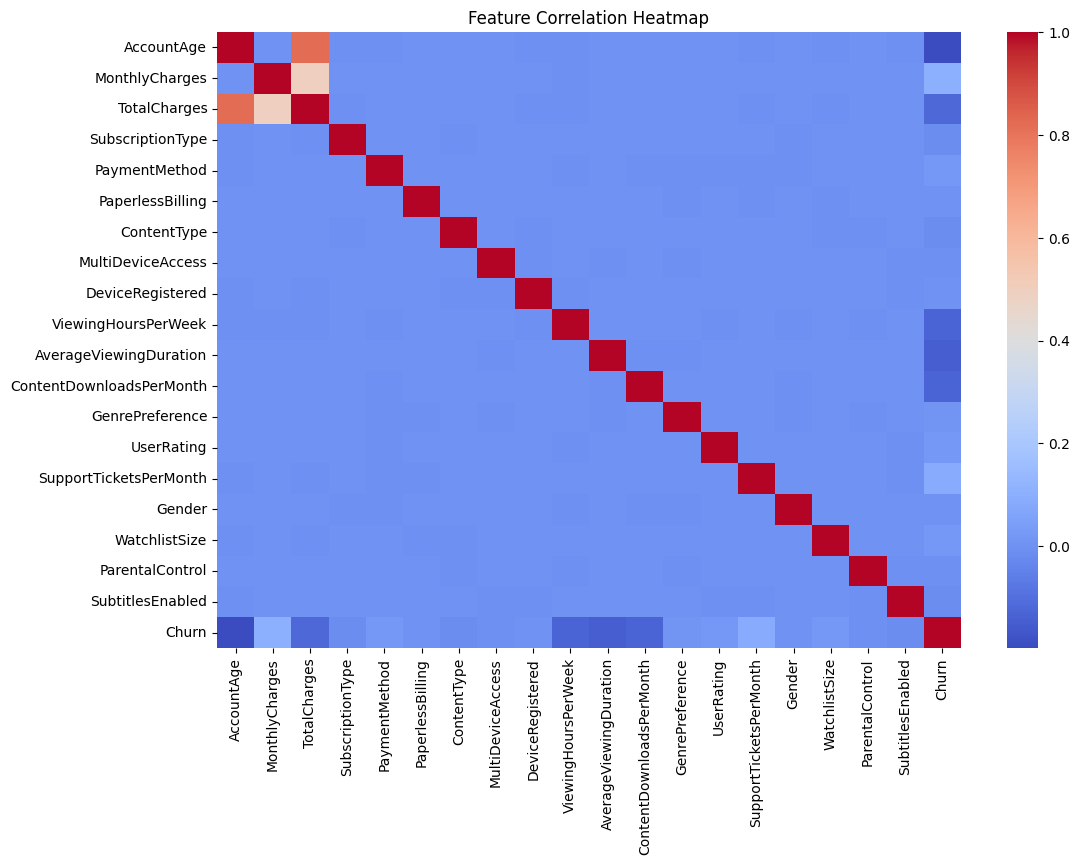

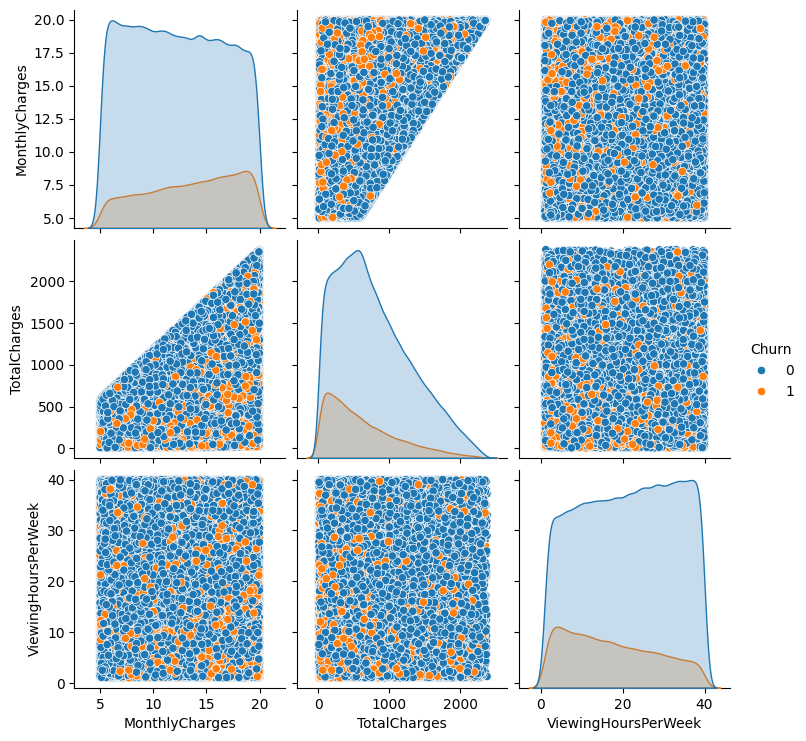

<ipython-input-4-61ee88443038>:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x='PaymentMethod', y='Churn', ci=None)


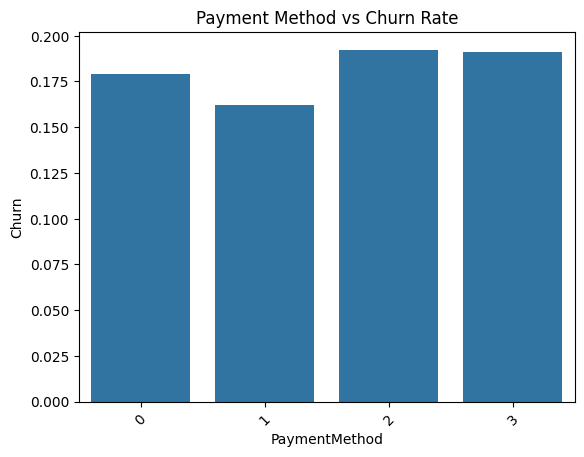

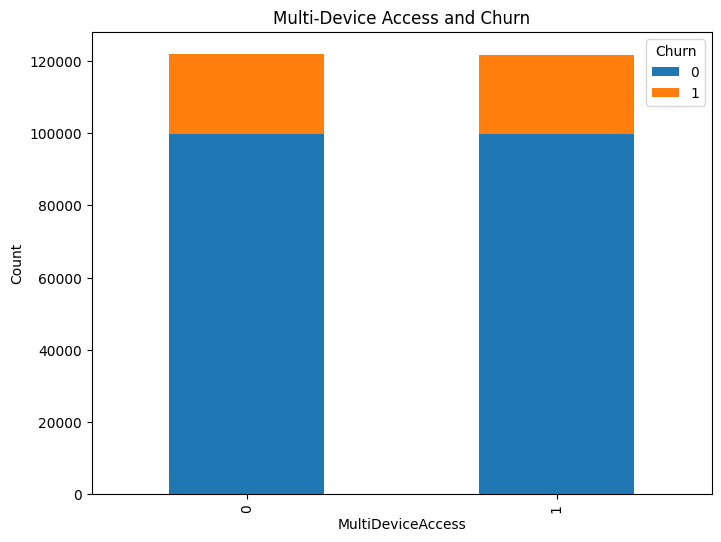

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load datasets
train_path = '/content/train.csv'
test_path = '/content/test.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Data Cleaning: Check for missing values
def clean_data(data):
    data = data.copy()
    # Convert TotalCharges to numeric and replace non-numeric values with NaN
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

    # Check for missing values and fill with the median
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        data[column].fillna(data[column].median(), inplace=True)
    return data


train_data = clean_data(train_data)
test_data = clean_data(test_data)

# Encode categorical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    if col != 'CustomerID':  # Exclude CustomerID from encoding
        train_data[col] = le.fit_transform(train_data[col])
        test_data[col] = le.transform(test_data[col])

# Feature and target separation
X = train_data.drop(columns=['Churn', 'CustomerID'])
y = train_data['Churn']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Additional Visualizations
# 1. Distribution of Monthly Charges
sns.histplot(train_data, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

# 2. Countplot for SubscriptionType
sns.countplot(data=train_data, x='SubscriptionType', hue='Churn')
plt.title("Subscription Type vs Churn")
plt.show()

# 3. Boxplot for Viewing Hours
sns.boxplot(data=train_data, x='Churn', y='ViewingHoursPerWeek')
plt.title("Viewing Hours per Week by Churn")
plt.show()

# Filter numeric columns only
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# 5. Pairplot for selected features
sns.pairplot(train_data, vars=['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek'], hue='Churn')
plt.show()

# 6. Barplot for PaymentMethod
sns.barplot(data=train_data, x='PaymentMethod', y='Churn', ci=None)
plt.title("Payment Method vs Churn Rate")
plt.xticks(rotation=45)
plt.show()

# 7. Stacked bar plot for MultiDeviceAccess and Churn
device_access = train_data.groupby(['MultiDeviceAccess', 'Churn']).size().unstack()
device_access.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Multi-Device Access and Churn")
plt.ylabel("Count")
plt.show()

# Save processed data for further analysis
train_data.to_csv('/content/train.csv', index=False)
test_data.to_csv('/content/test.csv', index=False)
